In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import balanced_accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.svm import SVC

cols = ['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex',
        'capital-gain','capital_loss','hours-per-week','native-country','income']
        
adults_df = pd.read_csv('adult.data', names = cols)
adults_df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital_loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# question 1

In [39]:
def missing_data(columns):
    adults_df[columns] = np.where(adults_df[columns] == ' ?', np.nan, adults_df[columns])
    return adults_df[columns]
columns = ['workclass', 'occupation']
adults_df[columns] = missing_data(columns)
adults_df = adults_df.dropna()


In [40]:
def one_hot_encoding(columns, dataframe):
    adults_df = pd.get_dummies(dataframe, columns =columns, dtype = int)
    return adults_df

columns = ['workclass','marital-status','occupation','race','sex']
pd.set_option('display.max_columns', None)
adults_df = one_hot_encoding(columns, adults_df)
adults_df.head()

,age,fnlwgt,education,education_num,relationship,capital-gain,capital_loss,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,Bachelors,13,Not-in-family,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,50,83311,Bachelors,13,Husband,0,0,13,United-States,<=50K,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,38,215646,HS-grad,9,Not-in-family,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,234721,11th,7,Husband,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,28,338409,Bachelors,13,Wife,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [41]:
adults_df = adults_df.drop_duplicates() 
adults_df['income'] = np.where(adults_df['income'].str.contains('>') ,1,0)
adults_df.head()

,age,fnlwgt,education,education_num,relationship,capital-gain,capital_loss,hours-per-week,native-country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,Bachelors,13,Not-in-family,2174,0,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,50,83311,Bachelors,13,Husband,0,0,13,United-States,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,38,215646,HS-grad,9,Not-in-family,0,0,40,United-States,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,234721,11th,7,Husband,0,0,40,United-States,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,28,338409,Bachelors,13,Wife,0,0,40,Cuba,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


I cleaned up more columns than before by chagning the catagorical data in numerical. I made sure to eliminate all the missing
values before one hot encoding.

# question 2

In [42]:
adults_df['income'].value_counts()

income
0    23046
1     7648
Name: count, dtype: int64

In [43]:
columns = ['workclass_ Federal-gov','workclass_ Local-gov', 'workclass_ Private','workclass_ Self-emp-inc','workclass_ Self-emp-not-inc','workclass_ State-gov',	
          'marital-status_ Divorced','marital-status_ Married-AF-spouse','marital-status_ Married-civ-spouse','marital-status_ Married-spouse-absent',	
           'marital-status_ Never-married','marital-status_ Separated','marital-status_ Widowed','workclass_ Without-pay','occupation_ Adm-clerical',
           'occupation_ Armed-Forces','occupation_ Craft-repair','occupation_ Exec-managerial','occupation_ Farming-fishing','occupation_ Handlers-cleaners',
           'occupation_ Machine-op-inspct','occupation_ Other-service','occupation_ Priv-house-serv','occupation_ Prof-specialty','occupation_ Protective-serv',
           'occupation_ Sales','occupation_ Tech-support','occupation_ Transport-moving','race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other', 
           'race_ White','sex_ Female','sex_ Male','capital-gain','capital_loss','hours-per-week','education_num','age','income']
           
model_df = adults_df[columns]
model_df.head(5)

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,workclass_ Without-pay,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,capital-gain,capital_loss,hours-per-week,education_num,age,income
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2174,0,40,13,39,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,13,13,50,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,40,9,38,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,40,7,53,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,40,13,28,0


In [44]:
X = model_df.drop('income', axis=1)
y = model_df['income']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state= 32,
                                                   stratify = y)
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.fit_transform(X_test)

In [45]:
ros = RandomOverSampler(random_state= 32)
X_resampled, y_resampled = ros.fit_resample(X_train_Scaled, y_train)

In [51]:
model = LogisticRegression(random_state=32)
model.fit(X_resampled,y_resampled)

LogisticRegression(random_state=32)

In [53]:
y_pred = model.predict(X_test_Scaled)

balanced_accuracy_score(y_test,y_pred)

0.817996008225551

In [54]:
knn_model = KNeighborsClassifier(n_neighbors = 17)
knn_model.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=17)

In [55]:
y_knn_pred = knn_model.predict(X_test_Scaled)
balanced_accuracy_score(y_test, y_knn_pred)

0.7928471674723951

i chose oversampling to have more instaces of people earning over 50k since thats what the modle is tryin to 
predict

both model performed signficantly better after oversampling with logistic regression jumping from an accuracy of 0.76 to 0.818
and the knn model jumping from 0.735 to 0.79

# Question3

In [15]:
y_pred_proba = model.predict_proba(X_test_Scaled)
y_knn_pred_proba = knn_model.predict_proba(X_test_Scaled)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_knn_pred_proba[:, 1], pos_label=1)

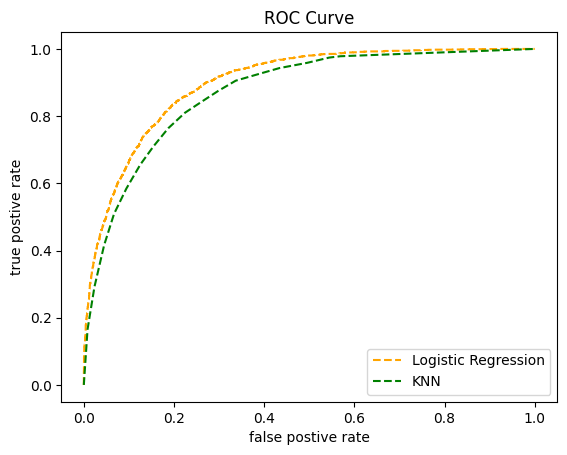

In [16]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('ROC',dpi=300)
plt.show()

In [17]:
auc_score1 = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score2 = roc_auc_score(y_test, y_knn_pred_proba[:,1])

print(auc_score1, auc_score2)

0.8997898867064584 0.8718706889434653


# question 4

In [34]:
X = model_df.drop('income', axis=1)
y = model_df['income']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state= 32,
                                                   stratify = y)
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.fit_transform(X_test)

In [35]:
ros = RandomOverSampler(random_state= 32)
X_resampled, y_resampled = ros.fit_resample(X_train_Scaled, y_train)

In [1]:
SVM_model = SVC(kernel='linear', random_state =32, binary = logistic)
SVM_model.fit(X_resampled,y_resampled)


NameError: name 'SVC' is not defined

In [37]:
y_pred = SVM_model.predict(X_test_Scaled)
balanced_accuracy_score(y_test,y_pred)

0.8126865826843706

the svm model perfromed very well. it did better than the knn model but slightly worse than the logistic regression model

# question 5

Outlier Detetction is the procedure by which data points that are outside the average are detected. 
Outlier detection can be helpful when the event we are tryin to predict is uncommon. Identifying the extreme 
data points helps to more effectively detect these rare occurrences. 
There are several outlier detection methods such box plot visualizations, isolation forests, and OneClassSVM